In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
import sklearn.metrics as metrics

In [20]:
df=pd.read_csv('Data/PolyData.csv')

In [21]:
df.shape

(200, 3)

In [22]:
df.describe()

,Unnamed: 0,x,y
count,200.000000,200.000000,200.000000
mean,99.500000,0.048185,4.553311
std,57.879185,1.740626,2.868315
min,0.000000,-2.981895,0.093381
25%,49.750000,-1.451444,2.376499
50%,99.500000,0.084696,3.722721
75%,149.250000,1.574805,6.256276
max,199.000000,2.970836,12.932011


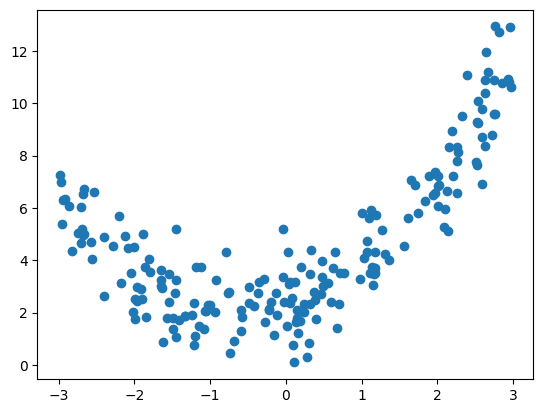

In [23]:
plt.scatter(df['x'],df['y'])

In [24]:
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('y',axis=1),df['y'],
                                               test_size=0.2,
                                               random_state=5)

In [26]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.coef_
y_pred=lr.predict(X_test)

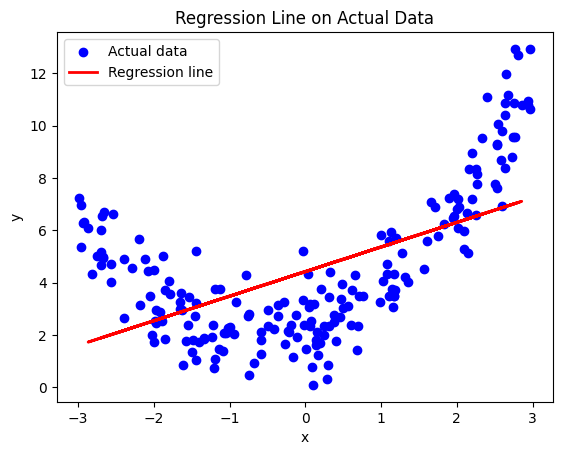

In [28]:

plt.scatter(df['x'], df['y'], color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line on Actual Data')
plt.legend()
plt.show()


In [29]:
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)

print(mse)
print(mae)
print(rmse)
print(r2)

6.889254671361425
2.196254716311203
2.6247389720430157
0.3322030024235859


### Creating Polynomial Features

In [13]:
x=df['x'].values.reshape(-1,1)
y=df['y'].values.reshape(-1,1)
poly=PolynomialFeatures(degree=3)   # degreee is hyperparameter
X_poly=poly.fit_transform(x)
X_poly

array([[ 1.00000000e+00, -2.16618885e-01,  4.69237415e-02,
        -1.01645686e-02],
       [ 1.00000000e+00,  2.94549332e+00,  8.67593089e+00,
         2.55548965e+01],
       [ 1.00000000e+00, -2.81807687e+00,  7.94155723e+00,
        -2.23799187e+01],
       [ 1.00000000e+00, -1.64173663e+00,  2.69529916e+00,
        -4.42497136e+00],
       [ 1.00000000e+00,  2.00467439e-01,  4.01871942e-02,
         8.05622391e-03],
       [ 1.00000000e+00,  1.17236292e+00,  1.37443481e+00,
         1.61133641e+00],
       [ 1.00000000e+00,  1.17163483e+00,  1.37272817e+00,
         1.60833614e+00],
       [ 1.00000000e+00, -1.89748867e+00,  3.60046324e+00,
        -6.83183819e+00],
       [ 1.00000000e+00,  1.65277113e+00,  2.73165240e+00,
         4.51479623e+00],
       [ 1.00000000e+00, -5.78914696e-01,  3.35142226e-01,
        -1.94018760e-01],
       [ 1.00000000e+00, -2.69239817e+00,  7.24900788e+00,
        -1.95172155e+01],
       [ 1.00000000e+00, -1.94059635e-01,  3.76591419e-02,
      

In [14]:
lr2=LinearRegression()
lr2.fit(X_poly,y)

LinearRegression()

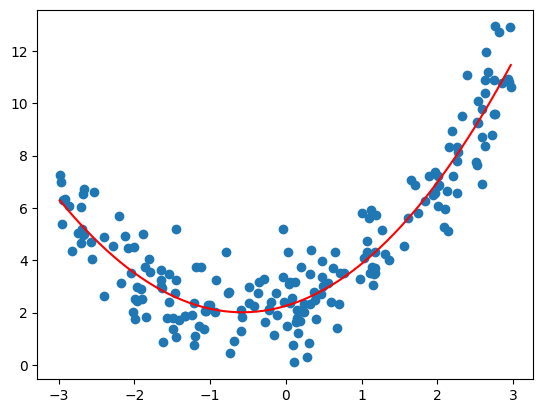

In [15]:
x_range=np.linspace(min(x),max(x),len(x))
plt.scatter(x,y)
plt.plot(x_range,lr2.predict(poly.fit_transform(x_range.reshape(-1,1))),color='red')